I will be carrying out an explanatory analysis on London Crime data set from June 2018 to May 2020. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:

- What type of crimes are the most common?
- What type of crimes has increased or decreased?
- What London Borough has the most crimes?
- What Borough has the most serious crime been committed?

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# upload the csv file from https://data.london.gov.uk/dataset/recorded_crime_summary
# file name MPS Borough Level Crime (most recent 24 months)
df = pd.read_csv('Borough_crime.csv')

In [4]:
#check the data
df.head()

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11


In [5]:
df.shape

(1566, 27)

In [6]:
# are there any missing values 
df.isnull().sum().sum()

0

I'm going to change the structure of the data set using melt from pandas:
- Transpose the months into columns

In [7]:
data = df.melt(id_vars=['MajorText', 'MinorText', 'LookUp_BoroughName'],var_name='YYYYMM',value_name='Value')

In [8]:
data.head()

,MajorText,MinorText,LookUp_BoroughName,YYYYMM,Value
0,Arson and Criminal Damage,Arson,Barking and Dagenham,201806,12
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201806,123
2,Burglary,Burglary - Business and Community,Barking and Dagenham,201806,33
3,Burglary,Burglary - Residential,Barking and Dagenham,201806,77
4,Drug Offences,Drug Trafficking,Barking and Dagenham,201806,6


Since the data is available from June 2018 to May 2020 (24 Months), I'm going to create a new column "Year" using np.where:
- Year1819 (June 2018 to May 2019)
- Year1920 (June 2019 to May 2020)

In [9]:
data['Year'] = np.where((data['YYYYMM'] >= '201806') & (data['YYYYMM']<='201905'),'Year1819','Year1920')

In [10]:
data.head()

,MajorText,MinorText,LookUp_BoroughName,YYYYMM,Value,Year
0,Arson and Criminal Damage,Arson,Barking and Dagenham,201806,12,Year1819
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,201806,123,Year1819
2,Burglary,Burglary - Business and Community,Barking and Dagenham,201806,33,Year1819
3,Burglary,Burglary - Residential,Barking and Dagenham,201806,77,Year1819
4,Drug Offences,Drug Trafficking,Barking and Dagenham,201806,6,Year1819


In [11]:
data.to_csv('new_data.csv')

In [12]:
data.shape

(37584, 6)

In [13]:
print('There are {} Boroughs in London'.format(data.LookUp_BoroughName.nunique()))

There are 33 Boroughs in London


## What type of crimes are the most common?

In [14]:
common =  pd.pivot_table(data,index='MinorText',columns='YYYYMM',values='Value',aggfunc='sum')

In [15]:
common_plot = common.sort_values(['201806', '201807', '201808', '201809', '201810', '201811', '201812',
       '201901', '201902', '201903', '201904', '201905', '201906', '201907',
       '201908', '201909', '201910', '201911', '201912', '202001', '202002',
       '202003', '202004', '202005'],ascending=False)

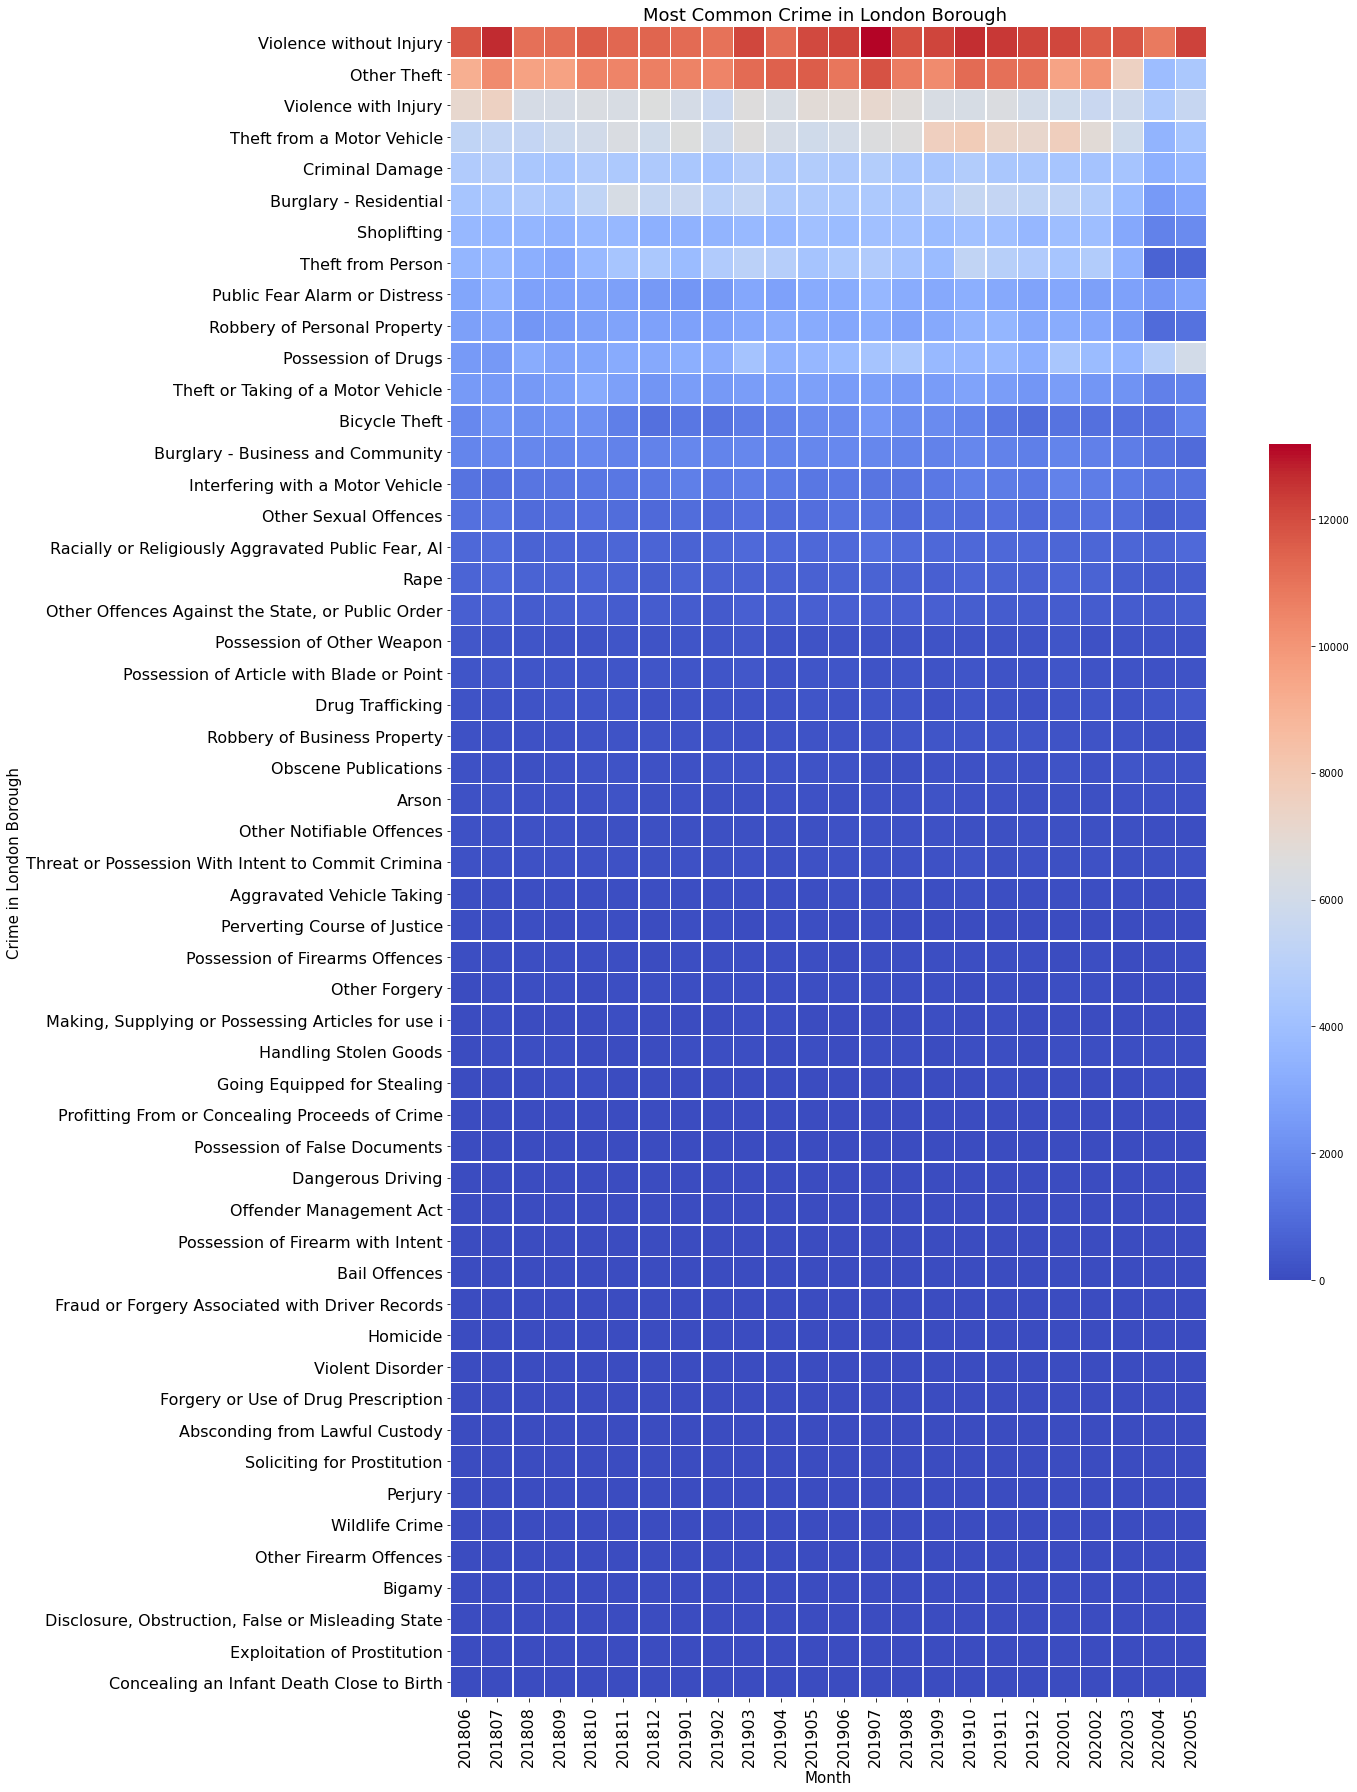

In [16]:
f, ax = plt.subplots(figsize=(20, 25))
sns.heatmap(common_plot, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5},square=True)
plt.title('Most Common Crime in London Borough ',fontsize=18)
plt.ylabel('Crime in London Borough',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()


From the heat map we can see Minor crimes are the most common crimes that have been committed across London such as theft, burglary and violence. There is pattern in Theft from a Motor Vehicle in Winter from Aug 2019 to Dec 2019.

We can see the crime numbers has decrease across all the category since covid-19 (march 2020).

## Are crime Increasing or Decreasing?

In [17]:
data.groupby('Year').sum()

,Value
Year,
Year1819,878882
Year1920,865665


In [18]:
data.groupby('Year').sum().pct_change().mul(100)

,Value
Year,
Year1819,NaN
Year1920,-1.503842


Crime has decrease by -1.5% from Year1819 to Year1920.

In [28]:
MoM = data.groupby(['YYYYMM','Year']).sum().reset_index()
MoM['Month'] =  MoM['YYYYMM'].str[4:] # pull months 
MM = pd.pivot_table(MoM,index='Year',columns='Month',values='Value')
Jun_Dec = MM.T.tail(7) #.plot()
Jan_May = MM.T.head(5)

Text(0.5, 0, 'Month - June to May')

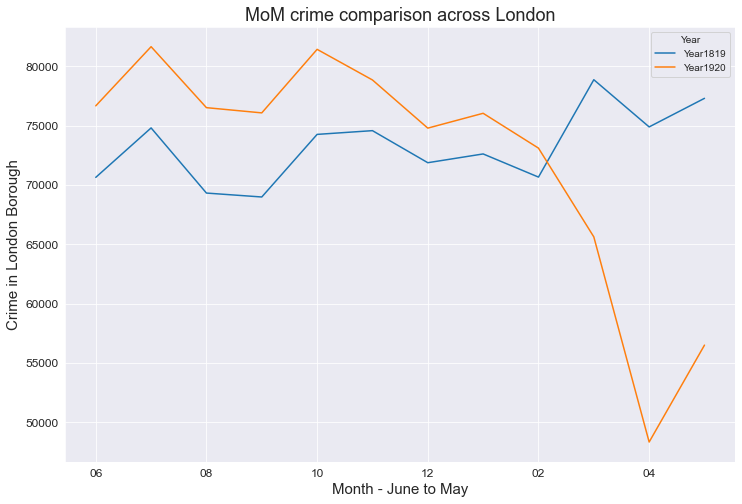

In [33]:
sns.set_style('darkgrid')
Jun_Dec.append(Jan_May).plot(figsize=(12, 8))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('MoM crime comparison across London',fontsize=18)
plt.ylabel('Crime in London Borough',fontsize=15)
plt.xlabel('Month - June to May',fontsize=15)

In [32]:
Jun_Dec.append(Jan_May).pct_change(axis=0)

Year,Year1819,Year1920
Month,,
06,NaN,NaN
07,0.058969,0.065003
08,-0.073356,-0.062909
09,-0.004775,-0.005750
10,0.076441,0.070360
11,0.004241,-0.031682
12,-0.036215,-0.051450
01,0.010281,0.016712
02,-0.026852,-0.038595


One of the reason for decrease in crime is because of Covid-19 and lockdown in London.

- Crime was 27% down from March to April 2020.
- Crime was 35% down when comparing with April 2019 vs April 2020
- Crime was 27% down when comparing with May 2019 vs May 2020

Also, we can see a cycle of two or three months where crime goes ups and this may be connected with police quota. 

## What type of crimes has increased or decreased?

In [17]:
crime_in_london = pd.pivot_table(data,index='MinorText',columns='Year',values='Value',aggfunc='sum')

In [18]:
crime_in_london.sort_values(['Year1819', 'Year1920'],ascending=False).nlargest(10,['Year1819', 'Year1920'])

Year,Year1819,Year1920
MinorText,,
Violence without Injury,138723,145295
Other Theft,125855,112780
Violence with Injury,78018,73267
Theft from a Motor Vehicle,71468,77420
Burglary - Residential,59982,53678
Criminal Damage,54575,51384
Theft from Person,48622,45957
Shoplifting,43367,42130
Possession of Drugs,37723,49574


In [19]:
Increase_in_crime =crime_in_london.pct_change(axis=1).mul(100).sort_values('Year1920',ascending=False).nlargest(5,'Year1920')

In [20]:
more_than_1000 = crime_in_london[crime_in_london['Year1920']>1000]

In [21]:
descrease_in_crime = more_than_1000.pct_change(axis=1).mul(100).sort_values('Year1920',ascending=True).head(5)

In [22]:
descrease_in_crime

Year,Year1819,Year1920
MinorText,,
Possession of Article with Blade or Point,NaN,-15.442671
Possession of Other Weapon,NaN,-14.858564
Burglary - Residential,NaN,-10.509820
Other Theft,NaN,-10.388940
Bicycle Theft,NaN,-10.310464


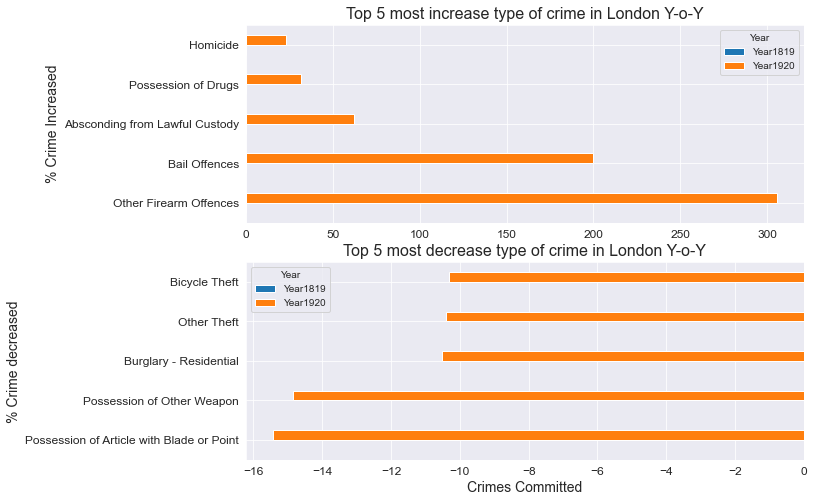

In [23]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(2,1,figsize=(10,8),squeeze=False)
ax1= Increase_in_crime.plot(kind='barh',ax=ax[0][0])
ax2 =descrease_in_crime.plot(kind='barh',ax=ax[1][0])
ax[0][0].set_ylabel('% Crime Increased',fontsize=14)
ax[1][0].set_ylabel('% Crime decreased',fontsize=14)
#ax[0][0].set_xlabel('Crimes Committed',fontsize=14)
ax[1][0].set_xlabel('Crimes Committed',fontsize=14)
ax[0][0].set_title('Top 5 most increase type of crime in London Y-o-Y',fontsize=16)
ax[1][0].set_title('Top 5 most decrease type of crime in London Y-o-Y',fontsize=16)
ax[0][0].tick_params(axis='both', which='major', labelsize=12)
ax[1][0].tick_params(axis='both', which='major', labelsize=12)

Firearm Offences has increase by 300% and which could be correlated with Possession of Drugs or Homicide.

Possession of Blade has decrease by 15% from last year, this could be due to stop and search policy relaunched in London.

## What London Borough has the most crimes?

In [24]:
borough = pd.pivot_table(data,index='LookUp_BoroughName',values='Value',aggfunc='sum')

In [25]:
borough.sort_values('Value',ascending=False).head(5)

,Value
LookUp_BoroughName,
Westminster,144220
Southwark,74133
Camden,73692
Newham,70706
Lambeth,69258


Westminster has twice as many crime cases register in the last 2 years. Lets check, if we can see any patters in crimes by month.

In [26]:
borough_year = pd.pivot_table(data,index='LookUp_BoroughName',columns='YYYYMM',values='Value',aggfunc='sum')

In [27]:
bor_mon = borough_year.sort_values(['201806', '201807', '201808', '201809', '201810', '201811', '201812',
       '201901', '201902', '201903', '201904', '201905', '201906', '201907',
       '201908', '201909', '201910', '201911', '201912', '202001', '202002',
       '202003', '202004', '202005'],ascending=False).head(5)

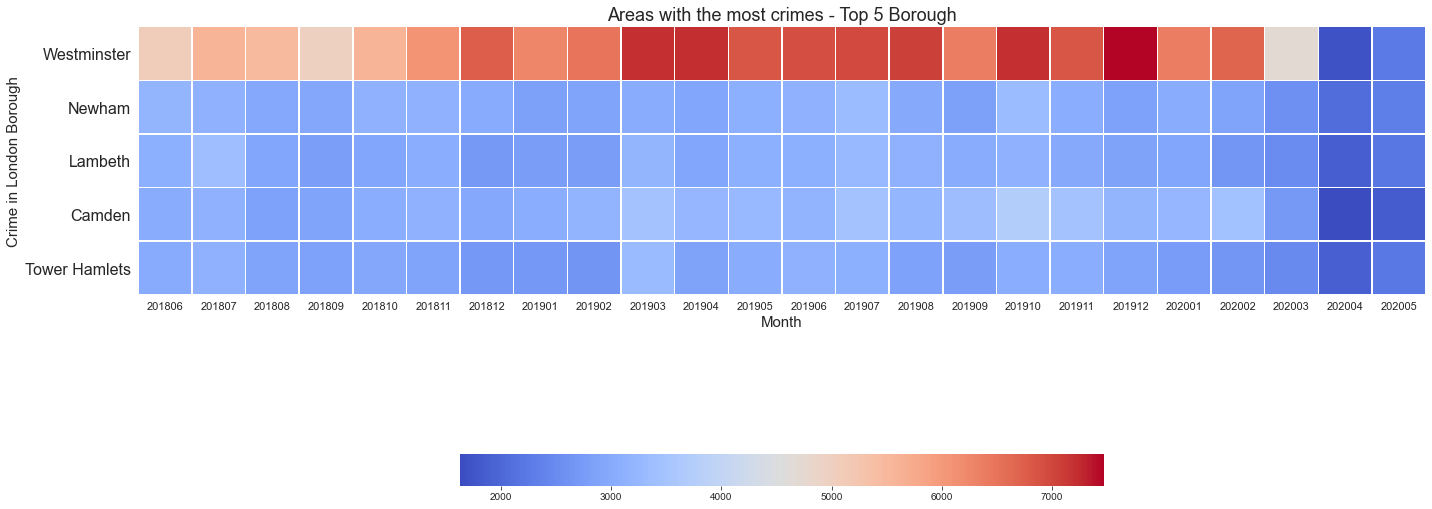

In [29]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(bor_mon, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": .5,"orientation": "horizontal"},square=True)
plt.title('Areas with the most crimes - Top 5 Borough',fontsize=18)
plt.ylabel('Crime in London Borough',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=11)

plt.tight_layout()

In [34]:
area = pd.pivot_table(data,index='LookUp_BoroughName',columns='YYYYMM',values='Value',aggfunc='sum')

In [35]:
mmm= ['201806', '201807', '201808', '201809', '201810', '201811', '201812',
       '201901', '201902', '201903', '201904', '201905', '201906', '201907',
       '201908', '201909', '201910', '201911', '201912', '202001', '202002',
       '202003', '202004', '202005']


top__5 = area.sort_values(mmm,ascending=False).head(5)
top__5 = top__5.reset_index()
Wst =  area.sort_values(mmm,ascending=False).head(1)
Wst = Wst.reset_index()

In [36]:
topp_5 =top__5.melt(id_vars=['LookUp_BoroughName'], var_name='YYYYMM',value_name='Value')
Wst =Wst.melt(id_vars=['LookUp_BoroughName'], var_name='YYYYMM',value_name='Value')

#### M-o-M Crime committed in Westminster

In [37]:
Wst['Value'].pct_change()

0          NaN
1     0.104327
2    -0.022365
3    -0.087116
4     0.119487
5     0.089362
6     0.108663
7    -0.068802
8     0.036465
9     0.108926
10    0.000416
11   -0.051239
12    0.010363
13    0.009101
14    0.012026
15   -0.097892
16    0.130939
17   -0.050194
18    0.090365
19   -0.143794
20    0.045504
21   -0.296291
22   -0.637194
23    0.318688
Name: Value, dtype: float64

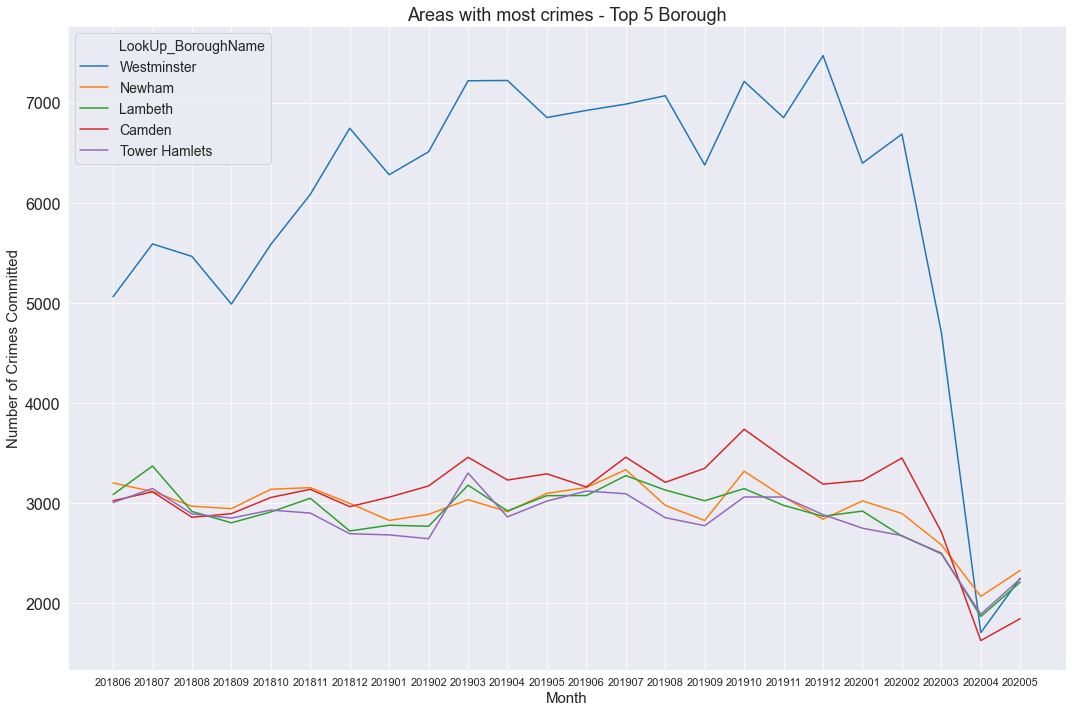

In [38]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.lineplot(x='YYYYMM',y='Value',hue='LookUp_BoroughName',data=topp_5)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=11)
plt.title('Areas with most crimes - Top 5 Borough',fontsize=18)
plt.ylabel('Number of Crimes Committed',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.legend(fontsize=14)
plt.tight_layout()

On Average 5000+ crime cases are register in Westminster each Month and the closes borough to that is Newham with 3000+ cases registered on average.

- We can see the crime has been down since the covid 19 pandemic hit the UK specially in London with 20k deaths.

- crime is 63% down from March 2020 to April 2020

- There is a cycle every 3 month the crime goes down, this could be due to Police policy in terms of arrest been made. 

### Westminister - What type of crime is been committed?

In [174]:
westminster = data[data['LookUp_BoroughName']=='Westminster']

In [180]:
westminster_year = pd.pivot_table(westminster,index='MinorText',columns='Year',values='Value',aggfunc='sum')

In [187]:
westminster_year.sort_values(['Year1819','Year1920'],ascending=False)#.head(10)

Year,Year1819,Year1920
MinorText,,
Other Theft,19853,18811
Theft from Person,14136,12737
Violence without Injury,6743,6759
Shoplifting,4523,3858
Violence with Injury,3862,3656
Robbery of Personal Property,3736,3511
Theft from a Motor Vehicle,3398,3176
Burglary - Business and Community,2466,2400
Criminal Damage,2348,2067


#### Type of Crime increased or decreased? 

In [189]:
westminster_inc =westminster_year.pct_change(axis=1).mul(100).sort_values('Year1920',ascending=False).nlargest(8,'Year1920')

When looking decrease, I'm only going to look at category with 500 or more crimes.

In [198]:
more_than_500 = westminster_year[westminster_year['Year1819']>=500]

In [199]:
westminster_dec = more_than_500.pct_change(axis=1).mul(100).sort_values('Year1920',ascending=True).head(5)

In [196]:
westminster_inc[3:9]

Year,Year1819,Year1920
MinorText,,
Bail Offences,NaN,300.000000
Drug Trafficking,NaN,148.039216
Other Firearm Offences,NaN,100.000000
Exploitation of Prostitution,NaN,100.000000
Handling Stolen Goods,NaN,86.206897


In [200]:
westminster_dec

Year,Year1819,Year1920
MinorText,,
Interfering with a Motor Vehicle,NaN,-21.441774
Shoplifting,NaN,-14.702631
Criminal Damage,NaN,-11.967632
Other Sexual Offences,NaN,-9.909910
Theft from Person,NaN,-9.896718


Only serious crime has increased in Westminister such as Drug Trafficking by 148%. Shoplifting and Motor Vehicle crime has decreased by 15% to 20%.

## Serious Crime in London Borough - Homicide,Rape, Carrying Knife and Drug Tracking

In [491]:
hard_crime = data[(data['MinorText']=='Drug Trafficking') | (data['MinorText']=='Homicide') | (data['MinorText']=='Rape') | (data['MinorText']=='Possession of Article with Blade or Point')]

In [492]:
hard_crime_london = pd.pivot_table(hard_crime,index='MinorText',columns='Year',values='Value',aggfunc='sum')
hard_crime_london.sort_values(['Year1819','Year1920'],ascending=False)

Year,Year1819,Year1920
MinorText,,
Rape,8259,7537
Possession of Article with Blade or Point,3445,2913
Drug Trafficking,2895,3183
Homicide,117,144


In [494]:
hard_crime_borough = pd.pivot_table(hard_crime,index='LookUp_BoroughName',columns='Year',values='Value',aggfunc='sum')
hard_crime_borough.sort_values(['Year1819','Year1920'],ascending=False).head(10)

Year,Year1819,Year1920
LookUp_BoroughName,,
Lambeth,823,722
Croydon,782,767
Newham,771,668
Westminster,734,833
Southwark,688,559
Tower Hamlets,675,598
Lewisham,606,692
Haringey,562,554
Hammersmith and Fulham,548,274


In [495]:
hard_crime_borough_MM = pd.pivot_table(hard_crime,index='LookUp_BoroughName',columns='YYYYMM',values='Value',aggfunc='sum')
hard_crime_borough_MM =hard_crime_borough_MM.sort_values(['201806', '201807', '201808', '201809', '201810', '201811', '201812',
       '201901', '201902', '201903', '201904', '201905', '201906', '201907',
       '201908', '201909', '201910', '201911', '201912', '202001', '202002',
       '202003', '202004', '202005'],ascending=False)#.head(10)

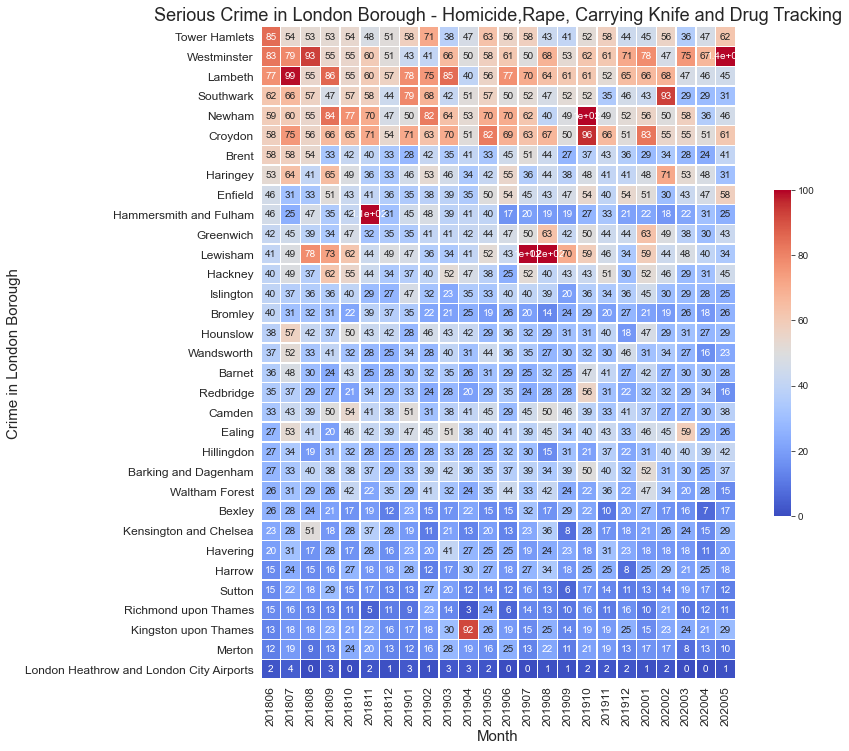

In [498]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(hard_crime_borough_MM, annot=True, cmap="coolwarm", linewidths=.5, vmin=0, vmax=100,cbar_kws={"shrink": .5},square=True)
plt.title('Serious Crime in London Borough - Homicide,Rape, Carrying Knife and Drug Tracking',fontsize=18)
plt.ylabel('Crime in London Borough',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)


Majority of the London Borough averages about 10 serious crimes cases each month.However from the heat map we can see some of the borough are averaging about 50 serious crime cases each month.Tower Hamlets has the most serious crime cases committed each month.

In [540]:
tower = pd.pivot_table(hard_crime,index=['LookUp_BoroughName','MinorText'],columns='YYYYMM',values='Value',aggfunc='sum').reset_index()

In [542]:
serious_crimes = tower[tower['LookUp_BoroughName']=='Tower Hamlets']

In [543]:
serious_crimes_1 =serious_crimes.melt(id_vars=['MinorText'], var_name='Months',value_name='Value')

In [547]:
serious_crimes_1 = serious_crimes_1[4:100]
serious_crimes_1['Value'] = serious_crimes_1['Value'].astype(int)

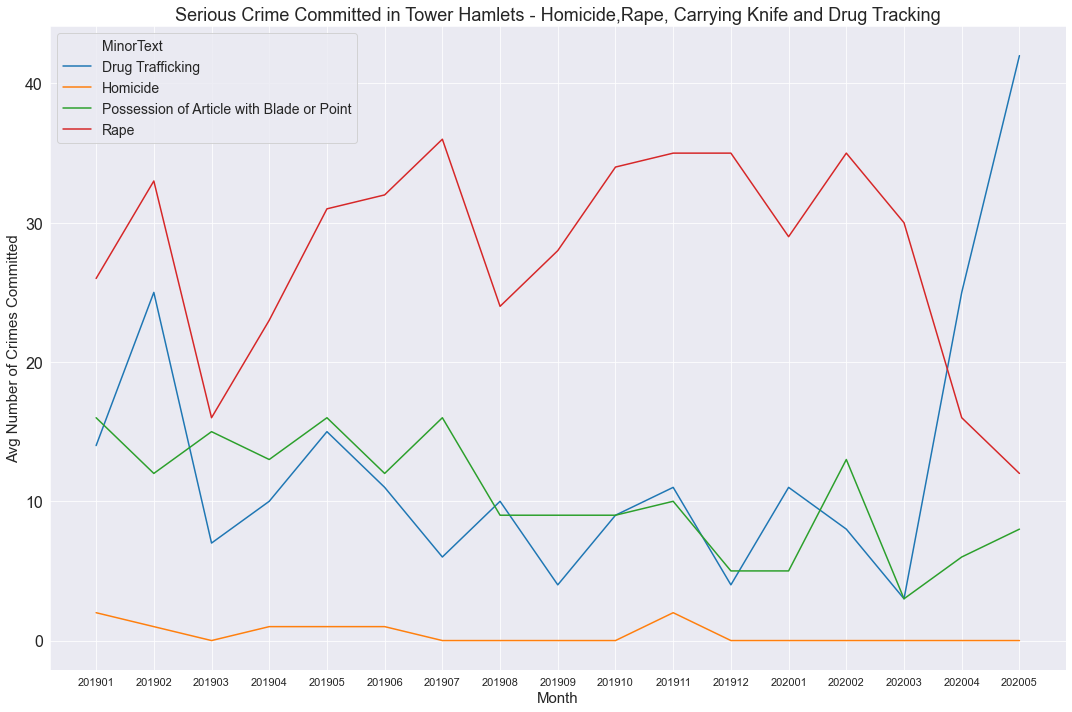

In [549]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.lineplot(x='Months',y='Value',hue='MinorText',data=serious_crimes_1)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=11)
plt.title('Serious Crime Committed in Tower Hamlets - Homicide,Rape, Carrying Knife and Drug Tracking',fontsize=18)
plt.ylabel('Avg Number of Crimes Committed',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.legend(fontsize=14)
plt.tight_layout()

Tower Hamlets has 25 rape cases on average each month however since covid 19 it has decreased. But Knife crime has increased since covid 19.

### Drug Crime 

In [557]:
Drug = data[data['MinorText']=='Drug Trafficking']

In [567]:
borough_Drug = pd.pivot_table(Drug,index='LookUp_BoroughName',columns='Year',values='Value',aggfunc='sum').reset_index()

In [568]:
Drugg = borough_Drug.melt(id_vars=['LookUp_BoroughName'],var_name='Year',value_name='Value')

In [583]:
borough_Drug.sort_values(['Year1819','Year1920'],ascending=False).head(5)

Year,LookUp_BoroughName,Year1819,Year1920
29,Tower Hamlets,181,144
20,Lambeth,171,138
24,Newham,169,159
21,Lewisham,141,250
27,Southwark,138,124


Tower Hamlets is one of the top boroughs with most Drug Trafficking cases in the last 2 years.

### Rape Crime 

In [573]:
Rape = data[data['MinorText']=='Rape']

In [574]:
borough_rape = pd.pivot_table(Rape,index='LookUp_BoroughName',columns='Year',values='Value',aggfunc='sum').reset_index()

In [575]:
Rappe = borough_rape.melt(id_vars=['LookUp_BoroughName'],var_name='Year',value_name='Value')

In [576]:
borough_rape.sort_values(['Year1819','Year1920'],ascending=False).head(5)

Year,LookUp_BoroughName,Year1819,Year1920
6,Croydon,493,459
20,Lambeth,444,398
32,Westminster,440,386
24,Newham,428,363
11,Hammersmith and Fulham,354,151


Croydon is one of the top boroughs with most Rape cases in the last 2 years.

### Homicide 

In [578]:
Homicide = data[data['MinorText']=='Homicide']

In [579]:
borough_Homicide = pd.pivot_table(Homicide,index='LookUp_BoroughName',columns='Year',values='Value',aggfunc='sum').reset_index()

In [580]:
Homicidee = borough_Homicide.melt(id_vars=['LookUp_BoroughName'],var_name='Year',value_name='Value')

In [584]:
borough_Homicide.sort_values(['Year1819','Year1920'],ascending=False).head(5)

Year,LookUp_BoroughName,Year1819,Year1920
25,Southwark,11,6
27,Waltham Forest,8,6
28,Wandsworth,7,7
9,Greenwich,7,6
26,Tower Hamlets,7,3


### Knife

In [585]:
Knife = data[data['MinorText']=='Possession of Article with Blade or Point']

In [586]:
borough_Knife = pd.pivot_table(Knife,index='LookUp_BoroughName',columns='Year',values='Value',aggfunc='sum').reset_index()

In [587]:
Knnife = borough_Knife.melt(id_vars=['LookUp_BoroughName'],var_name='Year',value_name='Value')

In [588]:
borough_Knife.sort_values(['Year1819','Year1920'],ascending=False).head(5)

Year,LookUp_BoroughName,Year1819,Year1920
20,Lambeth,203,180
27,Southwark,196,142
32,Westminster,188,192
6,Croydon,172,151
24,Newham,168,135


Lambeth is one of the top boroughs with most Knife related cases in the last 2 years.